In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn as sk

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier

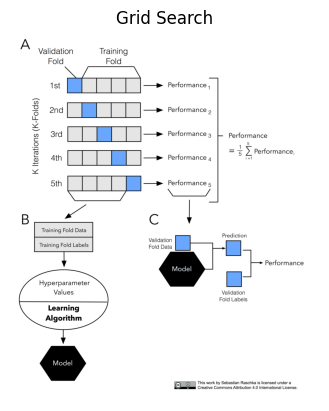

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img

imagem = img.imread('grid_search.png')
plt.imshow(imagem)
plt.title('Grid Search')
plt.axis('off') 
plt.show()

# CARREGANDO BASE DE DADOS

In [30]:
dados_treino = pd.read_csv("train.csv")
dados_teste = pd.read_csv("test.csv")
dados_treino.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# PRE-PREOCESSAMENTO DOS DADOS

1. Separação dos dados em X (variáveis independentes) e y (variável dependente)
2. Normalização

In [31]:
X_train = dados_treino.iloc[:, 1:]
y_train = dados_treino.iloc[:, 0]
X_test = dados_teste.iloc[:, 1:]
y_test = dados_teste.iloc[:, 0]
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       ...,
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557]])

# CRIANDO A ARQUETETURA DA REDE NEURAL (MLP)

In [33]:
def create_model(optimizer='adam'):
    modelo = Sequential()
    modelo.add(Dense(units=128, activation='relu', kernel_initializer='he_normal'))
    modelo.add(Dense(units=10, activation='softmax'))
    modelo.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return modelo

# GridSearch na MLP

In [34]:
# create model
model = KerasClassifier(model=create_model, verbose=1)

In [35]:
# define the grid search parameters
optimizer = ['SGD', 'Adam']
batch_size = [16, 32]
epochs = [20, 30]
param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)


In [36]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=None, cv=5)
grid_result = grid.fit(X_train, y_train)

ValueError: 
All the 40 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\GABRIEL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\GABRIEL\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\Users\GABRIEL\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "c:\Users\GABRIEL\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py", line 926, in _fit
    self._check_model_compatibility(y)
  File "c:\Users\GABRIEL\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py", line 549, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                   ^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: object of type 'NoneType' has no len()


# Resultados

In [ ]:
print(f"Melhor acurácia: {grid_result.best_score_}")
print(f"Melhores parâmetros: {grid_result.best_params_}")

for mean, std, params in zip(grid_result.cv_results_['mean_test_score'], 
                              grid_result.cv_results_['std_test_score'], 
                              grid_result.cv_results_['params']):
    print(f"Acurácia média: {mean:.4f} (Desvio padrão: {std:.4f}) com parâmetros: {params}")


Best: 0.887717 using {'batch_size': 32, 'epochs': 30, 'optimizer': 'SGD'}
0.887167 (0.003656) with: {'batch_size': 16, 'epochs': 20, 'optimizer': 'SGD'}
0.880950 (0.002661) with: {'batch_size': 16, 'epochs': 20, 'optimizer': 'Adam'}
0.883267 (0.001825) with: {'batch_size': 16, 'epochs': 30, 'optimizer': 'SGD'}
0.881200 (0.002503) with: {'batch_size': 16, 'epochs': 30, 'optimizer': 'Adam'}
0.886567 (0.003055) with: {'batch_size': 32, 'epochs': 20, 'optimizer': 'SGD'}
0.883967 (0.002997) with: {'batch_size': 32, 'epochs': 20, 'optimizer': 'Adam'}
0.887717 (0.002917) with: {'batch_size': 32, 'epochs': 30, 'optimizer': 'SGD'}
0.883000 (0.003662) with: {'batch_size': 32, 'epochs': 30, 'optimizer': 'Adam'}


# Otimizando SGD

In [ ]:
def create_model_SGD(neurons=128, learn_rate=0.01, momentum=0):
    ann = Sequential()
    ann.add(Dense(units=neurons, activation='relu', kernel_initializer='he_normal'))
    ann.add(Dense(units=10, activation='softmax'))
    optimizer = tf.keras.optimizers.SGD(learning_rate=learn_rate, momentum=momentum)
    ann.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return ann

# create model
model = KerasClassifier(build_fn=create_model_SGD, epochs=30, batch_size=32, verbose=2)

In [ ]:
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1]
momentum = [0.0, 0.2, 0.4]
neurons = [64, 128]
param_grid = dict(neurons=neurons, learn_rate=learn_rate, momentum=momentum)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=None, cv=5)
grid_result = grid.fit(X_train, y_train)

Epoch 1/30
1500/1500 - 2s - loss: 1.0021 - accuracy: 0.6674
Epoch 2/30
1500/1500 - 2s - loss: 0.6473 - accuracy: 0.7781
Epoch 3/30
1500/1500 - 2s - loss: 0.5688 - accuracy: 0.8024
Epoch 4/30
1500/1500 - 2s - loss: 0.5266 - accuracy: 0.8153
Epoch 5/30
1500/1500 - 2s - loss: 0.4995 - accuracy: 0.8236
Epoch 6/30
1500/1500 - 2s - loss: 0.4797 - accuracy: 0.8311
Epoch 7/30
1500/1500 - 2s - loss: 0.4645 - accuracy: 0.8362
Epoch 8/30
1500/1500 - 2s - loss: 0.4523 - accuracy: 0.8414
Epoch 9/30
1500/1500 - 2s - loss: 0.4420 - accuracy: 0.8452
Epoch 10/30
1500/1500 - 2s - loss: 0.4332 - accuracy: 0.8474
Epoch 11/30
1500/1500 - 2s - loss: 0.4254 - accuracy: 0.8501
Epoch 12/30
1500/1500 - 2s - loss: 0.4186 - accuracy: 0.8522
Epoch 13/30
1500/1500 - 2s - loss: 0.4125 - accuracy: 0.8539
Epoch 14/30
1500/1500 - 2s - loss: 0.4069 - accuracy: 0.8564
Epoch 15/30
1500/1500 - 2s - loss: 0.4016 - accuracy: 0.8585
Epoch 16/30
1500/1500 - 2s - loss: 0.3968 - accuracy: 0.8591
Epoch 17/30
1500/1500 - 2s - loss

Epoch 13/30
1500/1500 - 2s - loss: 0.4113 - accuracy: 0.8550
Epoch 14/30
1500/1500 - 2s - loss: 0.4055 - accuracy: 0.8561
Epoch 15/30
1500/1500 - 2s - loss: 0.4002 - accuracy: 0.8583
Epoch 16/30
1500/1500 - 2s - loss: 0.3951 - accuracy: 0.8599
Epoch 17/30
1500/1500 - 2s - loss: 0.3906 - accuracy: 0.8611
Epoch 18/30
1500/1500 - 2s - loss: 0.3863 - accuracy: 0.8626
Epoch 19/30
1500/1500 - 2s - loss: 0.3822 - accuracy: 0.8646
Epoch 20/30
1500/1500 - 2s - loss: 0.3785 - accuracy: 0.8660
Epoch 21/30
1500/1500 - 2s - loss: 0.3748 - accuracy: 0.8674
Epoch 22/30
1500/1500 - 2s - loss: 0.3715 - accuracy: 0.8680
Epoch 23/30
1500/1500 - 2s - loss: 0.3682 - accuracy: 0.8699
Epoch 24/30
1500/1500 - 2s - loss: 0.3650 - accuracy: 0.8699
Epoch 25/30
1500/1500 - 2s - loss: 0.3621 - accuracy: 0.8718
Epoch 26/30
1500/1500 - 2s - loss: 0.3592 - accuracy: 0.8730
Epoch 27/30
1500/1500 - 2s - loss: 0.3565 - accuracy: 0.8735
Epoch 28/30
1500/1500 - 2s - loss: 0.3539 - accuracy: 0.8746
Epoch 29/30
1500/1500 - 

Epoch 25/30
1500/1500 - 2s - loss: 0.3515 - accuracy: 0.8765
Epoch 26/30
1500/1500 - 2s - loss: 0.3486 - accuracy: 0.8780
Epoch 27/30
1500/1500 - 2s - loss: 0.3460 - accuracy: 0.8784
Epoch 28/30
1500/1500 - 2s - loss: 0.3432 - accuracy: 0.8799
Epoch 29/30
1500/1500 - 2s - loss: 0.3407 - accuracy: 0.8806
Epoch 30/30
1500/1500 - 2s - loss: 0.3383 - accuracy: 0.8810
375/375 - 0s - loss: 0.3800 - accuracy: 0.8634
Epoch 1/30
1500/1500 - 2s - loss: 0.9637 - accuracy: 0.6861
Epoch 2/30
1500/1500 - 2s - loss: 0.6275 - accuracy: 0.7852
Epoch 3/30
1500/1500 - 2s - loss: 0.5537 - accuracy: 0.8090
Epoch 4/30
1500/1500 - 2s - loss: 0.5131 - accuracy: 0.8216
Epoch 5/30
1500/1500 - 2s - loss: 0.4863 - accuracy: 0.8297
Epoch 6/30
1500/1500 - 2s - loss: 0.4669 - accuracy: 0.8369
Epoch 7/30
1500/1500 - 2s - loss: 0.4518 - accuracy: 0.8405
Epoch 8/30
1500/1500 - 2s - loss: 0.4394 - accuracy: 0.8452
Epoch 9/30
1500/1500 - 2s - loss: 0.4288 - accuracy: 0.8493
Epoch 10/30
1500/1500 - 2s - loss: 0.4198 - acc

1500/1500 - 2s - loss: 0.4583 - accuracy: 0.8390
Epoch 7/30
1500/1500 - 2s - loss: 0.4442 - accuracy: 0.8430
Epoch 8/30
1500/1500 - 2s - loss: 0.4324 - accuracy: 0.8479
Epoch 9/30
1500/1500 - 2s - loss: 0.4230 - accuracy: 0.8514
Epoch 10/30
1500/1500 - 2s - loss: 0.4144 - accuracy: 0.8547
Epoch 11/30
1500/1500 - 2s - loss: 0.4072 - accuracy: 0.8568
Epoch 12/30
1500/1500 - 2s - loss: 0.4005 - accuracy: 0.8591
Epoch 13/30
1500/1500 - 2s - loss: 0.3947 - accuracy: 0.8605
Epoch 14/30
1500/1500 - 2s - loss: 0.3893 - accuracy: 0.8624
Epoch 15/30
1500/1500 - 2s - loss: 0.3843 - accuracy: 0.8646
Epoch 16/30
1500/1500 - 2s - loss: 0.3799 - accuracy: 0.8661
Epoch 17/30
1500/1500 - 2s - loss: 0.3756 - accuracy: 0.8682
Epoch 18/30
1500/1500 - 2s - loss: 0.3715 - accuracy: 0.8691
Epoch 19/30
1500/1500 - 2s - loss: 0.3677 - accuracy: 0.8702
Epoch 20/30
1500/1500 - 2s - loss: 0.3642 - accuracy: 0.8721
Epoch 21/30
1500/1500 - 2s - loss: 0.3609 - accuracy: 0.8726
Epoch 22/30
1500/1500 - 2s - loss: 0.35

1500/1500 - 2s - loss: 0.3610 - accuracy: 0.8732
Epoch 19/30
1500/1500 - 2s - loss: 0.3571 - accuracy: 0.8743
Epoch 20/30
1500/1500 - 2s - loss: 0.3533 - accuracy: 0.8754
Epoch 21/30
1500/1500 - 2s - loss: 0.3498 - accuracy: 0.8766
Epoch 22/30
1500/1500 - 2s - loss: 0.3462 - accuracy: 0.8773
Epoch 23/30
1500/1500 - 2s - loss: 0.3429 - accuracy: 0.8785
Epoch 24/30
1500/1500 - 2s - loss: 0.3400 - accuracy: 0.8798
Epoch 25/30
1500/1500 - 2s - loss: 0.3369 - accuracy: 0.8810
Epoch 26/30
1500/1500 - 2s - loss: 0.3340 - accuracy: 0.8820
Epoch 27/30
1500/1500 - 2s - loss: 0.3312 - accuracy: 0.8830
Epoch 28/30
1500/1500 - 2s - loss: 0.3286 - accuracy: 0.8840
Epoch 29/30
1500/1500 - 2s - loss: 0.3260 - accuracy: 0.8846
Epoch 30/30
1500/1500 - 2s - loss: 0.3234 - accuracy: 0.8849
375/375 - 0s - loss: 0.3585 - accuracy: 0.8746
Epoch 1/30
1500/1500 - 2s - loss: 0.9014 - accuracy: 0.6959
Epoch 2/30
1500/1500 - 2s - loss: 0.5979 - accuracy: 0.7914
Epoch 3/30
1500/1500 - 2s - loss: 0.5313 - accuracy:

1500/1500 - 2s - loss: 0.3185 - accuracy: 0.8870
375/375 - 0s - loss: 0.3643 - accuracy: 0.8712
Epoch 1/30
1500/1500 - 2s - loss: 0.9238 - accuracy: 0.6961
Epoch 2/30
1500/1500 - 2s - loss: 0.5855 - accuracy: 0.7949
Epoch 3/30
1500/1500 - 2s - loss: 0.5187 - accuracy: 0.8183
Epoch 4/30
1500/1500 - 2s - loss: 0.4829 - accuracy: 0.8291
Epoch 5/30
1500/1500 - 2s - loss: 0.4592 - accuracy: 0.8376
Epoch 6/30
1500/1500 - 2s - loss: 0.4414 - accuracy: 0.8429
Epoch 7/30
1500/1500 - 2s - loss: 0.4277 - accuracy: 0.8485
Epoch 8/30
1500/1500 - 2s - loss: 0.4161 - accuracy: 0.8524
Epoch 9/30
1500/1500 - 2s - loss: 0.4063 - accuracy: 0.8561
Epoch 10/30
1500/1500 - 2s - loss: 0.3977 - accuracy: 0.8581
Epoch 11/30
1500/1500 - 2s - loss: 0.3904 - accuracy: 0.8616
Epoch 12/30
1500/1500 - 2s - loss: 0.3837 - accuracy: 0.8645
Epoch 13/30
1500/1500 - 2s - loss: 0.3778 - accuracy: 0.8665
Epoch 14/30
1500/1500 - 2s - loss: 0.3722 - accuracy: 0.8677
Epoch 15/30
1500/1500 - 2s - loss: 0.3673 - accuracy: 0.869

Epoch 12/30
1500/1500 - 2s - loss: 0.3693 - accuracy: 0.8690
Epoch 13/30
1500/1500 - 2s - loss: 0.3629 - accuracy: 0.8710
Epoch 14/30
1500/1500 - 2s - loss: 0.3571 - accuracy: 0.8728
Epoch 15/30
1500/1500 - 2s - loss: 0.3517 - accuracy: 0.8753
Epoch 16/30
1500/1500 - 2s - loss: 0.3467 - accuracy: 0.8770
Epoch 17/30
1500/1500 - 2s - loss: 0.3421 - accuracy: 0.8789
Epoch 18/30
1500/1500 - 2s - loss: 0.3378 - accuracy: 0.8799
Epoch 19/30
1500/1500 - 2s - loss: 0.3337 - accuracy: 0.8813
Epoch 20/30
1500/1500 - 2s - loss: 0.3296 - accuracy: 0.8832
Epoch 21/30
1500/1500 - 2s - loss: 0.3260 - accuracy: 0.8850
Epoch 22/30
1500/1500 - 2s - loss: 0.3225 - accuracy: 0.8859
Epoch 23/30
1500/1500 - 2s - loss: 0.3190 - accuracy: 0.8876
Epoch 24/30
1500/1500 - 2s - loss: 0.3157 - accuracy: 0.8888
Epoch 25/30
1500/1500 - 2s - loss: 0.3125 - accuracy: 0.8902
Epoch 26/30
1500/1500 - 2s - loss: 0.3096 - accuracy: 0.8904
Epoch 27/30
1500/1500 - 2s - loss: 0.3067 - accuracy: 0.8925
Epoch 28/30
1500/1500 - 

Epoch 24/30
1500/1500 - 2s - loss: 0.2097 - accuracy: 0.9247
Epoch 25/30
1500/1500 - 2s - loss: 0.2057 - accuracy: 0.9268
Epoch 26/30
1500/1500 - 2s - loss: 0.2013 - accuracy: 0.9291
Epoch 27/30
1500/1500 - 2s - loss: 0.1981 - accuracy: 0.9303
Epoch 28/30
1500/1500 - 2s - loss: 0.1949 - accuracy: 0.9309
Epoch 29/30
1500/1500 - 2s - loss: 0.1909 - accuracy: 0.9325
Epoch 30/30
1500/1500 - 2s - loss: 0.1878 - accuracy: 0.9339
375/375 - 0s - loss: 0.3342 - accuracy: 0.8891
Epoch 1/30
1500/1500 - 2s - loss: 0.5733 - accuracy: 0.8007
Epoch 2/30
1500/1500 - 2s - loss: 0.4156 - accuracy: 0.8523
Epoch 3/30
1500/1500 - 2s - loss: 0.3784 - accuracy: 0.8656
Epoch 4/30
1500/1500 - 2s - loss: 0.3556 - accuracy: 0.8743
Epoch 5/30
1500/1500 - 2s - loss: 0.3384 - accuracy: 0.8796
Epoch 6/30
1500/1500 - 2s - loss: 0.3247 - accuracy: 0.8839
Epoch 7/30
1500/1500 - 2s - loss: 0.3130 - accuracy: 0.8887
Epoch 8/30
1500/1500 - 2s - loss: 0.3029 - accuracy: 0.8924
Epoch 9/30
1500/1500 - 2s - loss: 0.2940 - acc

1500/1500 - 2s - loss: 0.3245 - accuracy: 0.8846
Epoch 6/30
1500/1500 - 2s - loss: 0.3099 - accuracy: 0.8910
Epoch 7/30
1500/1500 - 2s - loss: 0.2970 - accuracy: 0.8940
Epoch 8/30
1500/1500 - 2s - loss: 0.2856 - accuracy: 0.8990
Epoch 9/30
1500/1500 - 2s - loss: 0.2750 - accuracy: 0.9034
Epoch 10/30
1500/1500 - 2s - loss: 0.2656 - accuracy: 0.9060
Epoch 11/30
1500/1500 - 2s - loss: 0.2579 - accuracy: 0.9089
Epoch 12/30
1500/1500 - 2s - loss: 0.2494 - accuracy: 0.9123
Epoch 13/30
1500/1500 - 2s - loss: 0.2420 - accuracy: 0.9152
Epoch 14/30
1500/1500 - 2s - loss: 0.2346 - accuracy: 0.9174
Epoch 15/30
1500/1500 - 2s - loss: 0.2284 - accuracy: 0.9195
Epoch 16/30
1500/1500 - 2s - loss: 0.2215 - accuracy: 0.9218
Epoch 17/30
1500/1500 - 2s - loss: 0.2155 - accuracy: 0.9242
Epoch 18/30
1500/1500 - 2s - loss: 0.2099 - accuracy: 0.9264
Epoch 19/30
1500/1500 - 2s - loss: 0.2036 - accuracy: 0.9292
Epoch 20/30
1500/1500 - 2s - loss: 0.1985 - accuracy: 0.9311
Epoch 21/30
1500/1500 - 2s - loss: 0.193

1500/1500 - 2s - loss: 0.2107 - accuracy: 0.9257
Epoch 18/30
1500/1500 - 2s - loss: 0.2052 - accuracy: 0.9277
Epoch 19/30
1500/1500 - 2s - loss: 0.1994 - accuracy: 0.9295
Epoch 20/30
1500/1500 - 2s - loss: 0.1936 - accuracy: 0.9313
Epoch 21/30
1500/1500 - 2s - loss: 0.1885 - accuracy: 0.9347
Epoch 22/30
1500/1500 - 2s - loss: 0.1833 - accuracy: 0.9368
Epoch 23/30
1500/1500 - 2s - loss: 0.1790 - accuracy: 0.9382
Epoch 24/30
1500/1500 - 2s - loss: 0.1737 - accuracy: 0.9404
Epoch 25/30
1500/1500 - 2s - loss: 0.1696 - accuracy: 0.9417
Epoch 26/30
1500/1500 - 2s - loss: 0.1648 - accuracy: 0.9431
Epoch 27/30
1500/1500 - 2s - loss: 0.1610 - accuracy: 0.9444
Epoch 28/30
1500/1500 - 2s - loss: 0.1566 - accuracy: 0.9473
Epoch 29/30
1500/1500 - 2s - loss: 0.1530 - accuracy: 0.9492
Epoch 30/30
1500/1500 - 2s - loss: 0.1492 - accuracy: 0.9505
375/375 - 1s - loss: 0.3527 - accuracy: 0.8859
Epoch 1/30
1500/1500 - 2s - loss: 0.5586 - accuracy: 0.8029
Epoch 2/30
1500/1500 - 2s - loss: 0.4094 - accuracy

1500/1500 - 2s - loss: 0.1692 - accuracy: 0.9419
Epoch 30/30
1500/1500 - 2s - loss: 0.1668 - accuracy: 0.9425
375/375 - 0s - loss: 0.3656 - accuracy: 0.8827
Epoch 1/30
1500/1500 - 2s - loss: 0.5384 - accuracy: 0.8089
Epoch 2/30
1500/1500 - 2s - loss: 0.4001 - accuracy: 0.8578
Epoch 3/30
1500/1500 - 2s - loss: 0.3642 - accuracy: 0.8712
Epoch 4/30
1500/1500 - 2s - loss: 0.3415 - accuracy: 0.8776
Epoch 5/30
1500/1500 - 2s - loss: 0.3245 - accuracy: 0.8837
Epoch 6/30
1500/1500 - 2s - loss: 0.3101 - accuracy: 0.8882
Epoch 7/30
1500/1500 - 2s - loss: 0.2984 - accuracy: 0.8919
Epoch 8/30
1500/1500 - 2s - loss: 0.2878 - accuracy: 0.8958
Epoch 9/30
1500/1500 - 2s - loss: 0.2787 - accuracy: 0.9001
Epoch 10/30
1500/1500 - 2s - loss: 0.2702 - accuracy: 0.9035
Epoch 11/30
1500/1500 - 2s - loss: 0.2626 - accuracy: 0.9049
Epoch 12/30
1500/1500 - 2s - loss: 0.2551 - accuracy: 0.9077
Epoch 13/30
1500/1500 - 2s - loss: 0.2491 - accuracy: 0.9101
Epoch 14/30
1500/1500 - 2s - loss: 0.2417 - accuracy: 0.913

Epoch 11/30
1500/1500 - 2s - loss: 0.2405 - accuracy: 0.9148
Epoch 12/30
1500/1500 - 2s - loss: 0.2321 - accuracy: 0.9175
Epoch 13/30
1500/1500 - 2s - loss: 0.2241 - accuracy: 0.9219
Epoch 14/30
1500/1500 - 2s - loss: 0.2165 - accuracy: 0.9237
Epoch 15/30
1500/1500 - 2s - loss: 0.2094 - accuracy: 0.9272
Epoch 16/30
1500/1500 - 2s - loss: 0.2031 - accuracy: 0.9286
Epoch 17/30
1500/1500 - 2s - loss: 0.1964 - accuracy: 0.9310
Epoch 18/30
1500/1500 - 2s - loss: 0.1900 - accuracy: 0.9346
Epoch 19/30
1500/1500 - 2s - loss: 0.1842 - accuracy: 0.9370
Epoch 20/30
1500/1500 - 2s - loss: 0.1782 - accuracy: 0.9390
Epoch 21/30
1500/1500 - 2s - loss: 0.1731 - accuracy: 0.9411
Epoch 22/30
1500/1500 - 2s - loss: 0.1678 - accuracy: 0.9431
Epoch 23/30
1500/1500 - 2s - loss: 0.1625 - accuracy: 0.9456
Epoch 24/30
1500/1500 - 2s - loss: 0.1577 - accuracy: 0.9470
Epoch 25/30
1500/1500 - 2s - loss: 0.1533 - accuracy: 0.9482
Epoch 26/30
1500/1500 - 2s - loss: 0.1488 - accuracy: 0.9502
Epoch 27/30
1500/1500 - 

Epoch 23/30
1500/1500 - 2s - loss: 0.1773 - accuracy: 0.9378
Epoch 24/30
1500/1500 - 2s - loss: 0.1731 - accuracy: 0.9390
Epoch 25/30
1500/1500 - 2s - loss: 0.1685 - accuracy: 0.9412
Epoch 26/30
1500/1500 - 2s - loss: 0.1647 - accuracy: 0.9417
Epoch 27/30
1500/1500 - 2s - loss: 0.1603 - accuracy: 0.9438
Epoch 28/30
1500/1500 - 2s - loss: 0.1577 - accuracy: 0.9445
Epoch 29/30
1500/1500 - 2s - loss: 0.1529 - accuracy: 0.9466
Epoch 30/30
1500/1500 - 2s - loss: 0.1497 - accuracy: 0.9482
375/375 - 1s - loss: 0.3649 - accuracy: 0.8842
Epoch 1/30
1500/1500 - 2s - loss: 0.5315 - accuracy: 0.8146
Epoch 2/30
1500/1500 - 2s - loss: 0.3874 - accuracy: 0.8616
Epoch 3/30
1500/1500 - 2s - loss: 0.3528 - accuracy: 0.8726
Epoch 4/30
1500/1500 - 2s - loss: 0.3295 - accuracy: 0.8814
Epoch 5/30
1500/1500 - 2s - loss: 0.3131 - accuracy: 0.8870
Epoch 6/30
1500/1500 - 2s - loss: 0.2973 - accuracy: 0.8933
Epoch 7/30
1500/1500 - 2s - loss: 0.2852 - accuracy: 0.8970
Epoch 8/30
1500/1500 - 2s - loss: 0.2746 - ac

1500/1500 - 2s - loss: 0.3175 - accuracy: 0.8860
Epoch 5/30
1500/1500 - 2s - loss: 0.2980 - accuracy: 0.8923
Epoch 6/30
1500/1500 - 2s - loss: 0.2827 - accuracy: 0.8981
Epoch 7/30
1500/1500 - 2s - loss: 0.2691 - accuracy: 0.9020
Epoch 8/30
1500/1500 - 2s - loss: 0.2568 - accuracy: 0.9071
Epoch 9/30
1500/1500 - 2s - loss: 0.2455 - accuracy: 0.9112
Epoch 10/30
1500/1500 - 2s - loss: 0.2341 - accuracy: 0.9145
Epoch 11/30
1500/1500 - 2s - loss: 0.2253 - accuracy: 0.9192
Epoch 12/30
1500/1500 - 2s - loss: 0.2163 - accuracy: 0.9228
Epoch 13/30
1500/1500 - 2s - loss: 0.2082 - accuracy: 0.9263
Epoch 14/30
1500/1500 - 2s - loss: 0.1997 - accuracy: 0.9285
Epoch 15/30
1500/1500 - 2s - loss: 0.1927 - accuracy: 0.9316
Epoch 16/30
1500/1500 - 2s - loss: 0.1852 - accuracy: 0.9350
Epoch 17/30
1500/1500 - 2s - loss: 0.1787 - accuracy: 0.9367
Epoch 18/30
1500/1500 - 2s - loss: 0.1718 - accuracy: 0.9401
Epoch 19/30
1500/1500 - 2s - loss: 0.1654 - accuracy: 0.9427
Epoch 20/30
1500/1500 - 2s - loss: 0.1602

1500/1500 - 2s - loss: 0.1786 - accuracy: 0.9340
Epoch 17/30
1500/1500 - 2s - loss: 0.1734 - accuracy: 0.9363
Epoch 18/30
1500/1500 - 2s - loss: 0.1687 - accuracy: 0.9388
Epoch 19/30
1500/1500 - 2s - loss: 0.1636 - accuracy: 0.9381
Epoch 20/30
1500/1500 - 2s - loss: 0.1561 - accuracy: 0.9417
Epoch 21/30
1500/1500 - 2s - loss: 0.1502 - accuracy: 0.9447
Epoch 22/30
1500/1500 - 2s - loss: 0.1483 - accuracy: 0.9454
Epoch 23/30
1500/1500 - 2s - loss: 0.1437 - accuracy: 0.9475
Epoch 24/30
1500/1500 - 2s - loss: 0.1391 - accuracy: 0.9491
Epoch 25/30
1500/1500 - 2s - loss: 0.1410 - accuracy: 0.9479
Epoch 26/30
1500/1500 - 2s - loss: 0.1396 - accuracy: 0.9497
Epoch 27/30
1500/1500 - 2s - loss: 0.1260 - accuracy: 0.9537
Epoch 28/30
1500/1500 - 2s - loss: 0.1242 - accuracy: 0.9533
Epoch 29/30
1500/1500 - 2s - loss: 0.1188 - accuracy: 0.9568
Epoch 30/30
1500/1500 - 2s - loss: 0.1159 - accuracy: 0.9569
375/375 - 0s - loss: 0.6086 - accuracy: 0.8715
Epoch 1/30
1500/1500 - 2s - loss: 0.4855 - accurac

1500/1500 - 2s - loss: 0.0811 - accuracy: 0.9709
Epoch 29/30
1500/1500 - 2s - loss: 0.0805 - accuracy: 0.9715
Epoch 30/30
1500/1500 - 2s - loss: 0.0783 - accuracy: 0.9721
375/375 - 0s - loss: 0.6420 - accuracy: 0.8817
Epoch 1/30
1500/1500 - 2s - loss: 0.4821 - accuracy: 0.8316
Epoch 2/30
1500/1500 - 2s - loss: 0.3612 - accuracy: 0.8706
Epoch 3/30
1500/1500 - 2s - loss: 0.3213 - accuracy: 0.8833
Epoch 4/30
1500/1500 - 2s - loss: 0.2927 - accuracy: 0.8933
Epoch 5/30
1500/1500 - 2s - loss: 0.2716 - accuracy: 0.9013
Epoch 6/30
1500/1500 - 2s - loss: 0.2507 - accuracy: 0.9078
Epoch 7/30
1500/1500 - 2s - loss: 0.2341 - accuracy: 0.9138
Epoch 8/30
1500/1500 - 2s - loss: 0.2211 - accuracy: 0.9193
Epoch 9/30
1500/1500 - 2s - loss: 0.2120 - accuracy: 0.9221
Epoch 10/30
1500/1500 - 2s - loss: 0.1956 - accuracy: 0.9286
Epoch 11/30
1500/1500 - 2s - loss: 0.1896 - accuracy: 0.9314
Epoch 12/30
1500/1500 - 2s - loss: 0.1799 - accuracy: 0.9347
Epoch 13/30
1500/1500 - 2s - loss: 0.1621 - accuracy: 0.940

Epoch 10/30
1500/1500 - 2s - loss: 0.2330 - accuracy: 0.9148
Epoch 11/30
1500/1500 - 2s - loss: 0.2267 - accuracy: 0.9175
Epoch 12/30
1500/1500 - 2s - loss: 0.2179 - accuracy: 0.9206
Epoch 13/30
1500/1500 - 2s - loss: 0.2095 - accuracy: 0.9237
Epoch 14/30
1500/1500 - 2s - loss: 0.2037 - accuracy: 0.9269
Epoch 15/30
1500/1500 - 2s - loss: 0.1986 - accuracy: 0.9280
Epoch 16/30
1500/1500 - 2s - loss: 0.1957 - accuracy: 0.9296
Epoch 17/30
1500/1500 - 2s - loss: 0.1902 - accuracy: 0.9299
Epoch 18/30
1500/1500 - 2s - loss: 0.1837 - accuracy: 0.9341
Epoch 19/30
1500/1500 - 2s - loss: 0.1833 - accuracy: 0.9346
Epoch 20/30
1500/1500 - 2s - loss: 0.1820 - accuracy: 0.9360
Epoch 21/30
1500/1500 - 2s - loss: 0.1816 - accuracy: 0.9347
Epoch 22/30
1500/1500 - 2s - loss: 0.1780 - accuracy: 0.9372
Epoch 23/30
1500/1500 - 2s - loss: 0.1659 - accuracy: 0.9405
Epoch 24/30
1500/1500 - 2s - loss: 0.1507 - accuracy: 0.9453
Epoch 25/30
1500/1500 - 2s - loss: 0.1581 - accuracy: 0.9442
Epoch 26/30
1500/1500 - 

Epoch 22/30
1500/1500 - 2s - loss: 0.1580 - accuracy: 0.9421
Epoch 23/30
1500/1500 - 2s - loss: 0.1596 - accuracy: 0.9429
Epoch 24/30
1500/1500 - 2s - loss: 0.1553 - accuracy: 0.9439
Epoch 25/30
1500/1500 - 2s - loss: 0.1522 - accuracy: 0.9464
Epoch 26/30
1500/1500 - 2s - loss: 0.1508 - accuracy: 0.9460
Epoch 27/30
1500/1500 - 2s - loss: 0.1438 - accuracy: 0.9488
Epoch 28/30
1500/1500 - 2s - loss: 0.1505 - accuracy: 0.9488
Epoch 29/30
1500/1500 - 2s - loss: 0.1379 - accuracy: 0.9501
Epoch 30/30
1500/1500 - 2s - loss: 0.1307 - accuracy: 0.9526
375/375 - 0s - loss: 0.6821 - accuracy: 0.8695
Epoch 1/30
1500/1500 - 2s - loss: 0.4923 - accuracy: 0.8277
Epoch 2/30
1500/1500 - 2s - loss: 0.3750 - accuracy: 0.8672
Epoch 3/30
1500/1500 - 2s - loss: 0.3345 - accuracy: 0.8810
Epoch 4/30
1500/1500 - 2s - loss: 0.3094 - accuracy: 0.8874
Epoch 5/30
1500/1500 - 2s - loss: 0.2850 - accuracy: 0.8975
Epoch 6/30
1500/1500 - 2s - loss: 0.2699 - accuracy: 0.9029
Epoch 7/30
1500/1500 - 2s - loss: 0.2498 - a

1500/1500 - 2s - loss: 0.3266 - accuracy: 0.8796
Epoch 4/30
1500/1500 - 2s - loss: 0.3027 - accuracy: 0.8901
Epoch 5/30
1500/1500 - 2s - loss: 0.2838 - accuracy: 0.8960
Epoch 6/30
1500/1500 - 2s - loss: 0.2632 - accuracy: 0.9035
Epoch 7/30
1500/1500 - 2s - loss: 0.2513 - accuracy: 0.9094
Epoch 8/30
1500/1500 - 2s - loss: 0.2302 - accuracy: 0.9173
Epoch 9/30
1500/1500 - 2s - loss: 0.2184 - accuracy: 0.9209
Epoch 10/30
1500/1500 - 2s - loss: 0.2103 - accuracy: 0.9245
Epoch 11/30
1500/1500 - 2s - loss: 0.2047 - accuracy: 0.9265
Epoch 12/30
1500/1500 - 2s - loss: 0.1892 - accuracy: 0.9331
Epoch 13/30
1500/1500 - 2s - loss: 0.1817 - accuracy: 0.9345
Epoch 14/30
1500/1500 - 2s - loss: 0.1686 - accuracy: 0.9398
Epoch 15/30
1500/1500 - 2s - loss: 0.1634 - accuracy: 0.9428
Epoch 16/30
1500/1500 - 2s - loss: 0.1650 - accuracy: 0.9429
Epoch 17/30
1500/1500 - 2s - loss: 0.1813 - accuracy: 0.9407
Epoch 18/30
1500/1500 - 2s - loss: 0.1729 - accuracy: 0.9425
Epoch 19/30
1500/1500 - 2s - loss: 0.1466 

1500/1500 - 2s - loss: 0.2200 - accuracy: 0.9206
Epoch 16/30
1500/1500 - 2s - loss: 0.2260 - accuracy: 0.9199
Epoch 17/30
1500/1500 - 2s - loss: 0.2152 - accuracy: 0.9225
Epoch 18/30
1500/1500 - 2s - loss: 0.2244 - accuracy: 0.9224
Epoch 19/30
1500/1500 - 2s - loss: 0.2202 - accuracy: 0.9250
Epoch 20/30
1500/1500 - 2s - loss: 0.2201 - accuracy: 0.9259
Epoch 21/30
1500/1500 - 2s - loss: 0.2188 - accuracy: 0.9277
Epoch 22/30
1500/1500 - 2s - loss: 0.2042 - accuracy: 0.9305
Epoch 23/30
1500/1500 - 2s - loss: 0.1976 - accuracy: 0.9328
Epoch 24/30
1500/1500 - 2s - loss: 0.1859 - accuracy: 0.9356
Epoch 25/30
1500/1500 - 2s - loss: 0.1859 - accuracy: 0.9379
Epoch 26/30
1500/1500 - 2s - loss: 0.1896 - accuracy: 0.9367
Epoch 27/30
1500/1500 - 2s - loss: 0.1871 - accuracy: 0.9387
Epoch 28/30
1500/1500 - 2s - loss: 0.1761 - accuracy: 0.9404
Epoch 29/30
1500/1500 - 2s - loss: 0.1806 - accuracy: 0.9402
Epoch 30/30
1500/1500 - 2s - loss: 0.1646 - accuracy: 0.9425
375/375 - 0s - loss: 0.8498 - accura

1500/1500 - 2s - loss: 0.1725 - accuracy: 0.9471
Epoch 28/30
1500/1500 - 2s - loss: 0.1589 - accuracy: 0.9507
Epoch 29/30
1500/1500 - 2s - loss: 0.1614 - accuracy: 0.9514
Epoch 30/30
1500/1500 - 2s - loss: 0.1543 - accuracy: 0.9530
375/375 - 0s - loss: 0.8789 - accuracy: 0.8722
Epoch 1/30
1500/1500 - 2s - loss: 0.5164 - accuracy: 0.8242
Epoch 2/30
1500/1500 - 2s - loss: 0.4069 - accuracy: 0.8592
Epoch 3/30
1500/1500 - 2s - loss: 0.3610 - accuracy: 0.8736
Epoch 4/30
1500/1500 - 2s - loss: 0.3328 - accuracy: 0.8821
Epoch 5/30
1500/1500 - 2s - loss: 0.3112 - accuracy: 0.8907
Epoch 6/30
1500/1500 - 2s - loss: 0.3048 - accuracy: 0.8938
Epoch 7/30
1500/1500 - 2s - loss: 0.2918 - accuracy: 0.8999
Epoch 8/30
1500/1500 - 2s - loss: 0.2696 - accuracy: 0.9050
Epoch 9/30
1500/1500 - 2s - loss: 0.2662 - accuracy: 0.9105
Epoch 10/30
1500/1500 - 2s - loss: 0.2470 - accuracy: 0.9172
Epoch 11/30
1500/1500 - 2s - loss: 0.2428 - accuracy: 0.9177
Epoch 12/30
1500/1500 - 2s - loss: 0.2443 - accuracy: 0.918

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.887050 using {'learn_rate': 0.01, 'momentum': 0.2, 'neurons': 128}
0.863717 (0.003784) with: {'learn_rate': 0.001, 'momentum': 0.0, 'neurons': 64}
0.867467 (0.003153) with: {'learn_rate': 0.001, 'momentum': 0.0, 'neurons': 128}
0.867367 (0.003488) with: {'learn_rate': 0.001, 'momentum': 0.2, 'neurons': 64}
0.870383 (0.003017) with: {'learn_rate': 0.001, 'momentum': 0.2, 'neurons': 128}
0.872000 (0.002258) with: {'learn_rate': 0.001, 'momentum': 0.4, 'neurons': 64}
0.875650 (0.003004) with: {'learn_rate': 0.001, 'momentum': 0.4, 'neurons': 128}
0.884817 (0.002908) with: {'learn_rate': 0.01, 'momentum': 0.0, 'neurons': 64}
0.886567 (0.001164) with: {'learn_rate': 0.01, 'momentum': 0.0, 'neurons': 128}
0.882517 (0.003213) with: {'learn_rate': 0.01, 'momentum': 0.2, 'neurons': 64}
0.887050 (0.002101) with: {'learn_rate': 0.01, 'momentum': 0.2, 'neurons': 128}
0.882550 (0.000897) with: {'learn_rate': 0.01, 'momentum': 0.4, 'neurons': 64}
0.886133 (0.001937) with: {'learn_rate': 0.01

# Save best model
https://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [ ]:
best_model = Sequential()
best_model.add(Dense(units=128, activation='relu', kernel_initializer='he_normal'))
best_model.add(Dense(units=10, activation='softmax'))

opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)
best_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = best_model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5302 - accuracy: 0.8144
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3879 - accuracy: 0.8622
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3518 - accuracy: 0.8749
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3293 - accuracy: 0.8830
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3120 - accuracy: 0.8881
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2975 - accuracy: 0.8936
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2852 - accuracy: 0.8984
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2751 - accuracy: 0.9027
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2652 - accuracy: 0.9057
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.255

In [ ]:
loss, accuracy = best_model.evaluate(X_test, y_test)
print('Loss: %.2f' % loss)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.3213 - accuracy: 0.8909
Loss: 0.32
Accuracy: 89.09


In [ ]:
best_model.predict(X_test)[0]

array([9.93551016e-01, 9.93857885e-09, 3.59484955e-04, 1.04547462e-05,
       2.05208636e-07, 1.34142211e-10, 6.06917031e-03, 1.40890535e-08,
       9.67597862e-06, 6.45798193e-10], dtype=float32)

In [ ]:
model_json = best_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

best_model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# Load model

In [ ]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")

print("Loaded model from disk")

Loaded model from disk
